# Linear Regression With NumPy

In this notebook we will explore implimenting a linear regression model using only NumPy.
We will fit a 1-dimensional line, a 3-dimensional hyperplane, and a polynomial using our model.

##### Sections:
1. creating a linear regression model
2. linear regression with single variable
3. linear regression with multiple variables 
4. polynomial regression

### Imports

In [693]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

## 1. Define the Linear Regression Class

In [694]:
class LinearRegression:
    def fit(self, X, y, poly=False):
        self.poly = poly
        # Place a column of ones on the left of the features matrix X
        V = np.column_stack((np.ones(len(X)), X))
        
        A = V.T@V
        b = V.T@y
        
        self.w = np.linalg.lstsq(A, b, rcond=-1)[0]
        
    
    def predict(self, X):
        # Place a column of ones on the left of the features matrix X
        V = np.column_stack((np.ones(len(X)), X))
        return (V@self.w)
    
    
    def __str__(self):
        model_str = 'y = '
        flat_w = self.w.flatten()
        
        for i in range(len(flat_w)):
            if i==0:
                model_str += str(flat_w[i])
            else:
                if self.poly:
                    model_str += ' + ' + str(flat_w[i]) + '*x^' + str(i)
                else:
                    model_str += ' + ' + str(flat_w[i]) + '*x_' + str(i) 
        
        return model_str

## 2. One Dimensional Regression
First We will look at fiting a 1D line to some data with a single feature.

#### Generate the Dataset

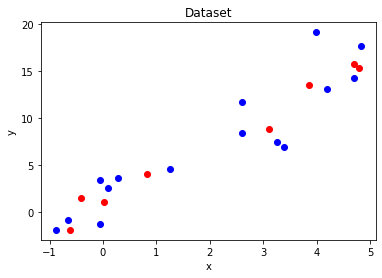

In [695]:
def line(x):
    return 3*x + 2 + np.random.normal(0, 2, x.shape)

np.random.seed(42)
X_train = np.random.uniform(-1, 5, 15)
y_train = line(X_train)

X_test = np.random.uniform(-1, 5, 8)
y_test = line(X_test)

plt.scatter(X_train, y_train, c='b', label='training data')
plt.scatter(X_test, y_test, c='r', label='testing data')
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Fit a Linear Regression Model to the Training Data

In [696]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.w)
print('Regression Model:\n', linreg, "\n")
print('Model Parameters:\n', linreg.w)

[1.33862129 3.00854165]
Regression Model:
 y = 1.338621288734943 + 3.008541646043216*x_1 

Model Parameters:
 [1.33862129 3.00854165]


In [697]:
y_pred = linreg.predict(X_test)

print('Actual Targets: ', np.round(y_test, 2))
print('Predictions:', np.round(y_pred, 2))

Actual Targets:  [ 1.04 -1.87 15.76 15.31 13.54  4.02  1.54  8.79]
Predictions: [ 1.41 -0.5  15.46 15.76 12.92  3.83  0.09 10.68]


#### Data and Model visualization

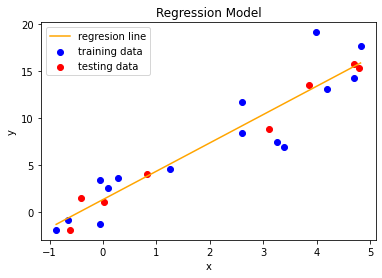

In [698]:
D = np.linspace(np.min(X_train), np.max(X_train), 2)
R = linreg.predict(D)

plt.plot(D, R, label='regresion line', c='orange')
plt.scatter(X_train, y_train, c='b', label='training data')
plt.scatter(X_test, y_test, c='r', label='testing data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Model')
plt.legend()
plt.show()

#### Metrics

$$ MAE = \frac{1}{n}\sum\left| y_i-\hat{y_i}  \right| $$

$$ MSE = \frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2 $$

$$ RMSE = \sqrt{\frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2} = \sqrt{MSE}$$

$$ r^2 = 1 - \frac{\sum\left( y_i-\hat{y_i}  \right)}{\sum\left( y_i-\bar{y}  \right)} $$

$$ r = \sqrt{r^2} $$

In [699]:
mae = np.sum(abs(y_test-y_pred)) / len(y_test)
mse = np.sum((y_test-y_pred)**2) / len(y_test)
rmse = np.sqrt(mse)
r2 = 1 - np.sum((y_test-y_pred)**2) / np.sum((y_test-np.mean(y_test))**2)
r = r2**(1/2)

print('Mean Absolute Error: %.2f' % mae)
print('Mean Squared Error: %.2f' % mse)
print('Root Mean Squares Error: %.2f' % rmse)
print('r2: %.2f' % r2)
print('r: %.2f' % r)

Mean Absolute Error: 0.83
Mean Squared Error: 1.05
Root Mean Squares Error: 1.03
r2: 0.98
r: 0.99


#### Ploting Confidence Intervals

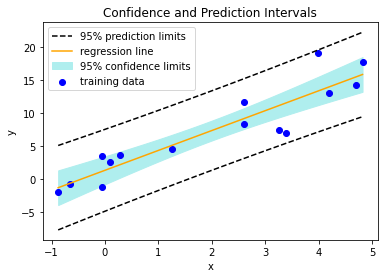

In [700]:
domain = np.linspace(np.min(X_train), np.max(X_train)) 
range_ = linreg.predict(domain)

residules = y_train-linreg.predict(X_train)

degfredom = len(X_train)-2 # Degrees of freedom.
s_err = np.sqrt(np.sum(residules**2) / degfredom)
t_crit = sp.stats.t.ppf(0.975, degfredom) # Critical t-value from Student's t-distribution inverse cdf.

pred_int = t_crit * s_err * np.sqrt(1 + 1/len(X_train) + (domain - np.mean(X_train))**2 / np.sum((X_train - np.mean(X_train))**2))
conf_int = t_crit * s_err * np.sqrt(1/len(X_train) + (domain - np.mean(X_train))**2 / np.sum((X_train - np.mean(X_train))**2))


# Plot the confidence intervals.
plt.fill_between(domain, range_+conf_int, range_-conf_int, color="paleturquoise", 
                 label='95% confidence limits')
plt.plot(domain, range_-pred_int, '--', c='black',
         label='95% prediction limits')
plt.plot(domain, range_+pred_int, '--', c='black')
plt.plot(domain, range_, label='regression line', c='orange')
plt.scatter(X_train, y_train, c='b', label='training data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Confidence and Prediction Intervals')
plt.legend()
plt.show()

## 3. Multiple Regression

Now we will look fiting some $n$-dimensional hyperplane to some data with $n$ features.

#### Generate Data

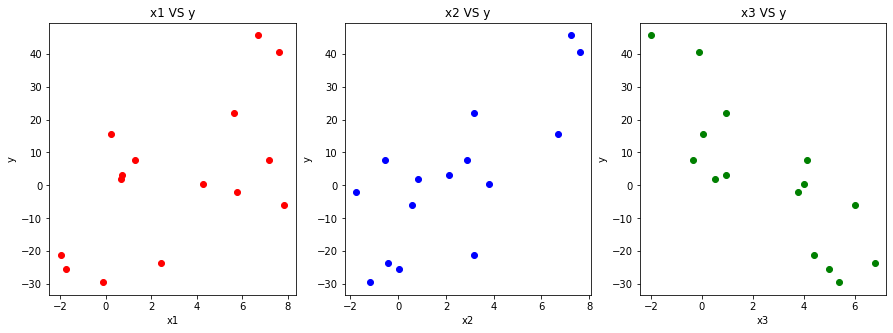

In [701]:
def hypPlane(X):
    return 3*X[:,0] + 2*X[:,1] - 5*X[:,2] + 1 + np.random.normal(0, 2, len(X))

np.random.seed(5)
# Training data
X_train = np.random.uniform(-2, 8, size=(15, 3))
y_train = hypPlane(X_train)

# Testing data
X_test = np.random.uniform(-2, 8, size=(8, 3))
y_test = hypPlane(X_test)

# Plot data
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
colors=['r', 'b', 'g']

for i in range(len(X_train[0])):
    plt.subplot(1, 3, i+1)
    plt.title('x' + str(i+1) + ' VS y')
    plt.scatter(X_train[:, i], y_train, c=colors[i])
    plt.ylabel('y')
    plt.xlabel('x' + str(i+1))

#### Fit a Linear Regression Model to the Training Data

In [702]:
multreg = LinearRegression()
multreg.fit(X_train, y_train)

print('Regression Model:\n', multreg, "\n")
print('Model Parameters:\n', multreg.w)

Regression Model:
 y = 2.8592781562368232 + 2.943807572925703*x_1 + 1.8025687144405533*x_2 + -5.161280219189666*x_3 

Model Parameters:
 [ 2.85927816  2.94380757  1.80256871 -5.16128022]


In [703]:
y_pred = multreg.predict(X_test)

print('Actual Targets: ', np.round(y_test, 2))
print('Predictions:', np.round(y_pred, 2))

Actual Targets:  [ 15.43 -22.8    2.05  -7.12   3.43 -13.72  35.96   5.56]
Predictions: [ 18.31 -22.19   0.1  -10.9    4.32 -12.77  38.04   6.31]


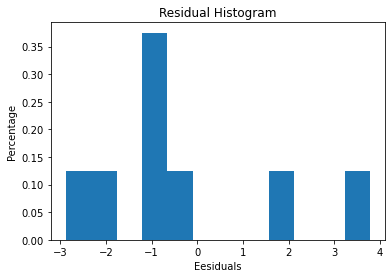

In [704]:
plt.hist((y_test-y_pred), bins=12, weights=np.ones(len(y_test))/len(y_test))
plt.title('Residual Histogram')
plt.xlabel('Eesiduals')
plt.ylabel('Percentage')
plt.show()

#### Metrics

$$ MAE = \frac{1}{n}\sum\left| y_i-\hat{y_i}  \right| $$

$$ MSE = \frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2 $$

$$ RMSE = \sqrt{\frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2} = \sqrt{MSE}$$

$$ r^2 = 1 - \frac{\sum\left( y_i-\hat{y_i}  \right)}{\sum\left( y_i-\bar{y}  \right)} $$

$$ r = \sqrt{r^2} $$

In [705]:
mae = np.sum(abs(y_test-y_pred)) / len(y_test)
mse = np.sum((y_test-y_pred)**2) / len(y_test)
rmse = np.sqrt(mse)
r2 = 1 - np.sum((y_test-y_pred)**2) / np.sum((y_test-np.mean(y_test))**2)
r = r2**(1/2)

print('Mean Absolute Error: %.2f' % mae)
print('Mean Squared Error: %.2f' % mse)
print('Root Mean Squares Error: %.2f' % rmse)
print('r2: %.2f' % r2)
print('r: %.2f' % r)

Mean Absolute Error: 1.74
Mean Squared Error: 4.17
Root Mean Squares Error: 2.04
r2: 0.99
r: 0.99


## 4. Polynomial Regression

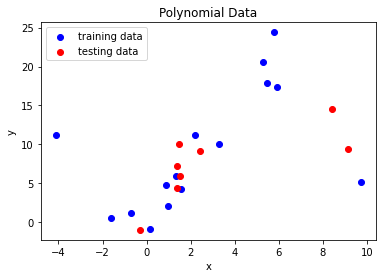

In [706]:
def poly(x):
    return -0.1*x**3 + 0.8*x**2 + 2*x + 1 + np.random.normal(0, 2, len(x))

np.random.seed(123)
X_train = np.random.uniform(-5, 10, 15)
y_train = poly(X_train)

X_test = np.random.uniform(-5, 10, 8)
y_test = poly(X_test)

plt.scatter(X_train, y_train, label='training data', c='b')
plt.scatter(X_test, y_test, label='testing data', c='r')
plt.title('Polynomial Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [707]:
def poly_features(x, deg):
    X = np.zeros((len(x), deg))
    
    for i in range(deg):
        X[:, i] = x**(i+1)
    
    return X

degree = 3 # Degree of the polynomial

polyreg = LinearRegression()
polyreg.fit(poly_features(X_train, degree), y_train, poly=True)

print('Regression Model:\n', polyreg, "\n")
print('Model Parameters:\n', polyreg.w)

Regression Model:
 y = 0.9599005585377303 + 2.1377218317369744*x^1 + 0.7548883971033999*x^2 + -0.09561374522305902*x^3 

Model Parameters:
 [ 0.95990056  2.13772183  0.7548884  -0.09561375]


In [708]:
y_pred = polyreg.predict(poly_features(X_test, 3))

print('Actual Targets: ', np.round(y_test, 2))
print('Predictions:', np.round(y_pred, 2))

Actual Targets:  [ 5.96 10.05  9.12  4.36 -1.    7.16 14.49  9.34]
Predictions: [ 5.56  5.4   9.14  5.12  0.36  5.15 15.51 10.37]


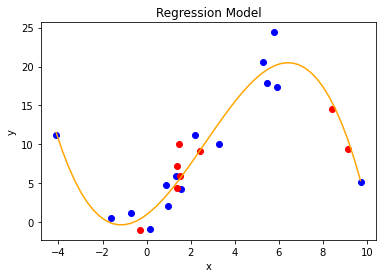

In [709]:
D = np.linspace(np.min(X_train), np.max(X_train), 50)
R = polyreg.predict(poly_features(D, degree))

plt.plot(D, R, label='regresion polynomial', c='orange')
plt.scatter(X_train, y_train, c='b', label='training data')
plt.scatter(X_test, y_test, c='r', label='testing data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Model')
plt.show()

#### Metrics

$$ MAE = \frac{1}{n}\sum\left| y_i-\hat{y_i}  \right| $$

$$ MSE = \frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2 $$

$$ RMSE = \sqrt{\frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2} = \sqrt{MSE}$$

$$ r^2 = 1 - \frac{\sum\left( y_i-\hat{y_i}  \right)}{\sum\left( y_i-\bar{y}  \right)} $$

$$ r = \sqrt{r^2} $$

In [710]:
mae = np.sum(abs(y_test-y_pred)) / len(y_test)
mse = np.sum((y_test-y_pred)**2) / len(y_test)
rmse = np.sqrt(mse)
r2 = 1 - np.sum((y_test-y_pred)**2) / np.sum((y_test-np.mean(y_test))**2)
r = r2**(1/2)

print('Mean Absolute Error: %.2f' % mae)
print('Mean Squared Error: %.2f' % mse)
print('Root Mean Squares Error: %.2f' % rmse)
print('r2: %.2f' % r2)
print('r: %.2f' % r)

Mean Absolute Error: 1.41
Mean Squared Error: 3.79
Root Mean Squares Error: 1.95
r2: 0.79
r: 0.89


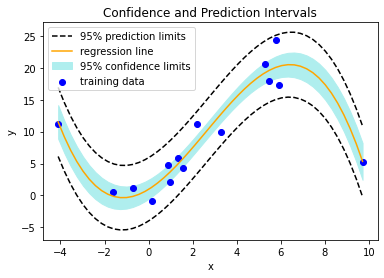

In [711]:
domain = np.linspace(np.min(X_train), np.max(X_train)) 
range_ = polyreg.predict(poly_features(domain, degree))

residules = y_train-polyreg.predict(poly_features(X_train, degree))

degfredom = len(X_train)-2 # Degrees of freedom.
s_err = np.sqrt(np.sum(residules**2) / degfredom)
t_crit = sp.stats.t.ppf(0.975, degfredom) # Critical t-value from Student's t-distribution inverse cdf.

pred_int = t_crit * s_err * np.sqrt(1 + 1/len(X_train) + (domain - np.mean(X_train))**2 / np.sum((X_train - np.mean(X_train))**2))
conf_int = t_crit * s_err * np.sqrt(1/len(X_train) + (domain - np.mean(X_train))**2 / np.sum((X_train - np.mean(X_train))**2))


# Plot the confidence intervals.
plt.fill_between(domain, range_+conf_int, range_-conf_int, color="paleturquoise", 
                 label='95% confidence limits')
plt.plot(domain, range_-pred_int, '--', c='black',
         label='95% prediction limits')
plt.plot(domain, range_+pred_int, '--', c='black')
plt.plot(domain, range_, label='regression line', c='orange')
plt.scatter(X_train, y_train, c='b', label='training data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Confidence and Prediction Intervals')
plt.legend()
plt.show()